In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ml_library import NeuralNetwork , z_score_normalization , train_test_split

In [38]:
df = pd.read_csv('./dataset/train_nn.csv')
df_test = pd.read_csv('./dataset/test_nn.csv')

df.shape , df_test.shape

((16000, 23), (4000, 21))

In [39]:
df.columns

Index(['Unnamed: 0', 'F_1', 'F_2', 'F_3', 'F_4', 'F_5', 'F_6', 'F_7', 'F_8',
       'F_9', 'F_10', 'F_11', 'F_12', 'F_13', 'F_14', 'F_15', 'F_16', 'F_17',
       'F_18', 'F_19', 'F_20', 'target_cls', 'target_reg'],
      dtype='object')

In [40]:
df_test.columns

Index(['Unnamed: 0', 'F_1', 'F_2', 'F_3', 'F_4', 'F_5', 'F_6', 'F_7', 'F_8',
       'F_9', 'F_10', 'F_11', 'F_12', 'F_13', 'F_14', 'F_15', 'F_16', 'F_17',
       'F_18', 'F_19', 'F_20'],
      dtype='object')

In [41]:
df.sample(5)

,Unnamed: 0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,target_cls,target_reg
3126,3126,4,8,4,5,3,5,11,8,3,...,3,7,6,11,12.56,3.75,5.36,84.0,18,7.00
5850,5850,5,9,8,7,5,10,7,3,7,...,3,6,4,11,25.12,8.75,6.03,33.3,18,7.77
6398,6398,7,10,6,5,4,8,9,3,4,...,3,9,6,7,18.84,5.00,6.70,33.6,6,8.68
11570,11570,5,10,4,5,3,9,6,3,4,...,3,9,8,12,12.56,5.00,6.70,33.6,5,8.31
15514,15514,3,8,6,6,3,11,2,2,2,...,3,7,3,9,18.84,2.50,5.36,22.8,1,6.24


In [42]:
df['target_cls'].value_counts().sort_index()

target_cls
1     640
2     613
3     599
4     649
5     627
6     635
7     613
8     590
9     609
10    598
11    609
12    606
13    624
14    632
15    608
16    630
17    617
18    598
19    577
20    633
21    630
22    606
23    604
24    633
25    618
26    602
Name: count, dtype: int64

In [ ]:
X = df.drop(columns=["target_cls", "target_reg", "Unnamed: 0"], axis=1).values
y = df["target_cls"].values
y = np.eye(26)[y]
X_test = df_test.drop("Unnamed: 0", axis=1).values
X.shape, y.shape

IndexError: index 25 is out of bounds for axis 0 with size 25

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train = z_score_normalization(X_train)
X_val = z_score_normalization(X_val)
X_test = z_score_normalization(X_test)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((12800, 20), (3200, 20), (12800, 1), (3200, 1))

In [ ]:
X_test.shape

(4000, 20)

In [ ]:
num_of_class = len(np.unique(y))

In [ ]:
nn = NeuralNetwork(
    learning_rate=0.03,
    epochs=1000,
    loss_function="categorical_cross_entropy",
    initialization="xavier",
    optimizer="adam",
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-8,
)
model = nn.Sequential(
    nn.Dense(200, activation="relu"),
    nn.Dense(100, activation="relu"),
    nn.Dense(num_of_class, activation="softmax"),
)
nn.fit(X_train, y_train, model)


Epoch 0: Loss 1179.8690415261901
Epoch 100: Loss 1179.8690241521876
Epoch 200: Loss 1179.869006778335
Epoch 300: Loss 1179.8689894044192
Epoch 400: Loss 1179.8689720308967
Epoch 500: Loss 1179.8689546575413
Epoch 600: Loss 1179.868937284508
Epoch 700: Loss 1179.868919908752
Epoch 800: Loss 1179.8689025311483
Epoch 900: Loss 1179.8688851536288


{'layers': ({'units': 200, 'activation': 'relu'},
  {'units': 100, 'activation': 'relu'},
  {'units': 26, 'activation': 'softmax'}),
 'parameters': {'w1': array([[ 0.04053175, -0.07569014, -0.08074834, ..., -0.24579066,
           0.33122629,  0.19392784],
         [-0.38639651, -0.34991767, -0.30768839, ...,  0.10859019,
          -0.18161663, -0.4544188 ],
         [ 0.12547217, -0.15767997, -0.12153299, ...,  0.19299597,
          -0.20731254,  0.02773225],
         ...,
         [ 0.08402463, -0.1409133 ,  0.18290966, ..., -0.09745015,
          -0.1959322 ,  0.0402062 ],
         [-0.34423497, -0.19304165, -0.22240371, ...,  0.09738149,
          -0.04151943,  0.27158482],
         [ 0.34317069, -0.14592009, -0.52437175, ..., -0.19430251,
          -0.21864281, -0.11381091]], shape=(20, 200)),
  'b1': array([[ 1.00000087e-07,  9.99931234e-08, -9.99995681e-08,
           9.99931828e-08,  1.00000477e-07,  1.00004557e-07,
          -9.99986105e-08, -9.99795349e-08,  1.00004454e-07,
 

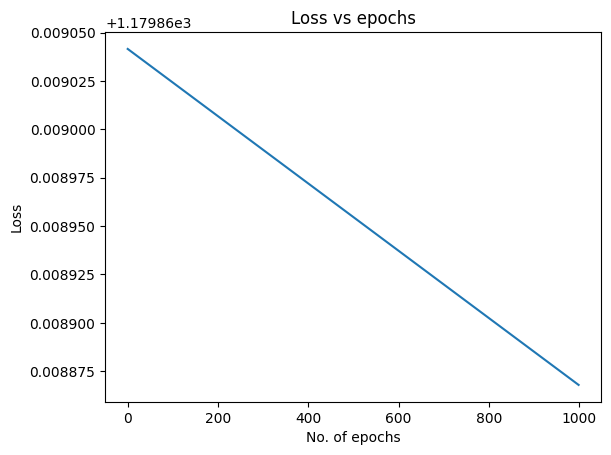

In [ ]:
nn.plot_loss()

In [ ]:
y_pred = nn.predict(X_val , model)
y_pred

array([[0.03963348, 0.04523365, 0.02401863, ..., 0.02833623, 0.05536112,
        0.0454249 ],
       [0.0428551 , 0.05187049, 0.03352161, ..., 0.0425621 , 0.06430955,
        0.04124142],
       [0.03446493, 0.04986749, 0.03292316, ..., 0.02444895, 0.05552163,
        0.02958369],
       ...,
       [0.04789589, 0.03419592, 0.01706498, ..., 0.01420474, 0.04105037,
        0.04282359],
       [0.02800258, 0.04598874, 0.07339774, ..., 0.03687049, 0.10166415,
        0.06461359],
       [0.0376973 , 0.03003192, 0.03063864, ..., 0.01775327, 0.03599881,
        0.03885444]], shape=(3200, 26))

In [ ]:
y_val_true = np.argmax(y_val , axis= 1)
y_val_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_val_pred

array([21, 24,  3, ...,  7, 24, 22], shape=(3200,))

In [ ]:
y_val

array([[ 2],
       [ 7],
       [12],
       ...,
       [17],
       [17],
       [12]], shape=(3200, 1))